In [1]:
from aitk.robots import World, Vehicle, LightSensor,SmellSensor,__version__
__version__

'0.9.14'

# Braitenberg Vehicles

This notebook explores some of the vehicles described by Valentino Braitenberg in his book entitled *Vehicles: Experiments in Synthetic Psychology*. 

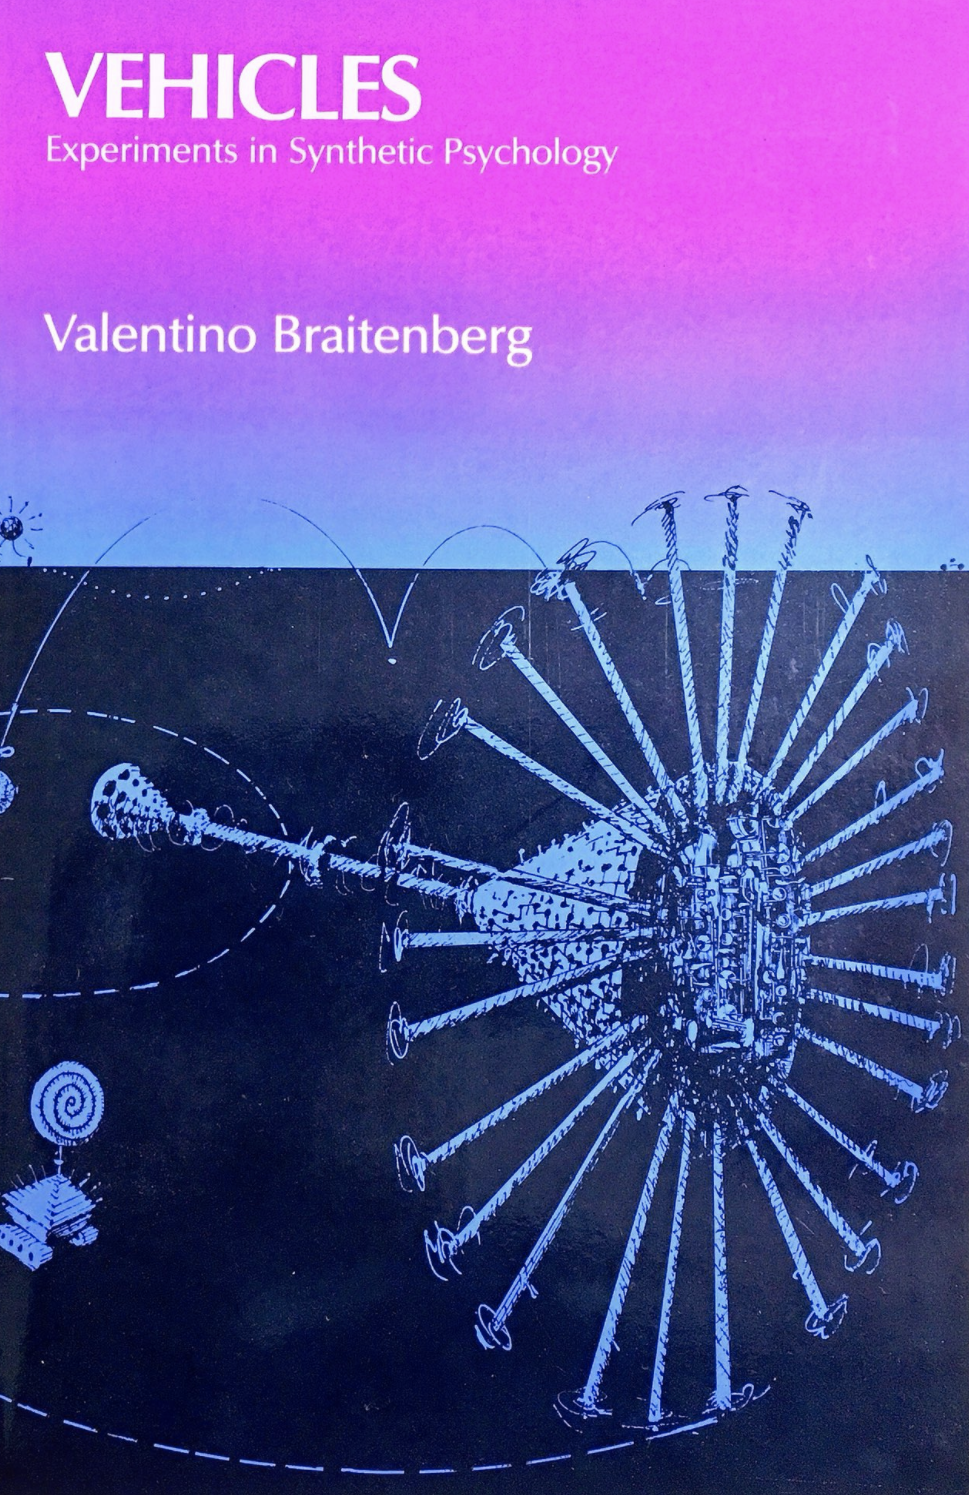

Below is a short excerpt from page 2 of the book where he introduces his approach: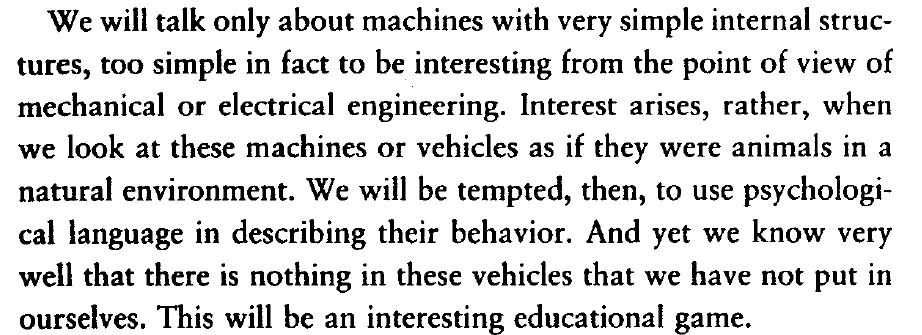

In particular he considers wheeled machines, or robots, where the motor speeds of the robot's wheels are directly determined by the robot's sensors.  Braitenberg argues that simple changes in the configurations of how sensors affect motor speeds yield very different types of behavior from the robot. In these examples, we will use light sensors. Braitenberg numbered his different vehicles from simplest to more complex.  Vehicle 1 has only a single sensor and single wheel. We will skip this one and begin our exploration with Vehicle 2. 

In [2]:
world = World(width=150, height=150, scale=3.0, boundary_wall=False)
world.add_bulb("yellow", 75, 75, 0, 50)

Random seed set to: 9468028


Notice in the command above where we created the world, we've set it up so that the outer wall will not be treated as a boundary.  Instead, as the robot approaches the wall, it will simply wrap around to the opposite side of the world.

In [3]:
robot = Vehicle(x=50,y=100,a=90)
robot.add_device(LightSensor(position=(6,-6), name="left-light"))
robot.add_device(LightSensor(position=(6,6), name="right-light"))
world.add_robot(robot)

In [4]:
world.watch()

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

### A simple world and robot

The world has a light source in the center, and the robot is equipped with two light sensors on its front left and front right. 

## Connecting sensors to wheels

Consider two possible ways of connecting sensors to wheels shown below (from Figure 1 on page 7 of *Vehicles*). On the left (a), the sensors are connected to the wheels on the same side of the robot.  On the right (b), the sensors are connected to wheels on the opposite side of the robot.

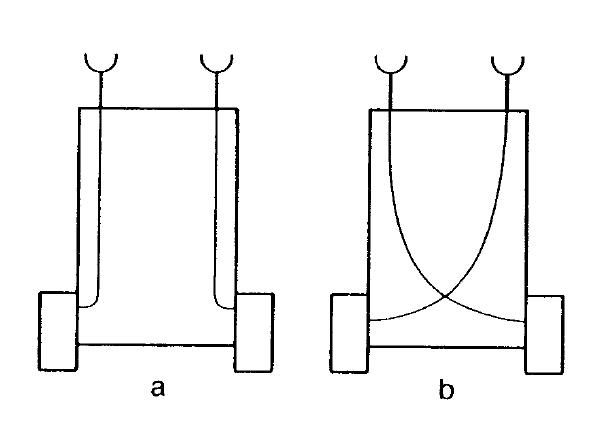

## Positive connections

First, let's consider if we make these connections be positive. In other words, as the light reading on a sensor increases, the wheel connected to that sensor will go faster.  And as the light reading decreases, the wheel connected to that sensor will go slower.  What sort of behavior will these two types of possible positive connections create?

### Vehicle 2a
As the left sensor reads more light, the left wheel will go faster making the robot turn right.  Similarly as the right sensor reads more light, the right wheel will go faster making the robot turn left. Let's watch what happens.

In [6]:
def vehicle2a(robot):
    left = robot["left-light"].get_brightness()
    right = robot["right-light"].get_brightness()
    robot.speak("%d%d" % (left*10, right*10))
    robot.motors(left, right)

NOTE: Each vehicle will speak it's current left and right light readings as two numbers in a bubble as it moves. The higher the numbers the more light being sensed. A "00" indicates low light being sensed on both sides.  A "51" indicates that the light reading is stronger on the left than on the right. A "99" indicates that both sensors are reading very high light values.

In [7]:
world.reset()
world.run([vehicle2a])

Using random seed: 9468028


0it [00:00, ?it/s]

Simulation stopped at: 00:00:06.8; speed 0.98 x real time


Braitenberg described the resulting behavior as **fear** because the robot moves quickly away from the light source and tries to hide in the corners.

### Vehicle 2b
Now let's look at using positive crossed connections. As the left light sensor reads more light, the right wheel will go faster making the robot turn left. As the right light sensor reads more light, the left wheel will go faster making the robot turn right. Let's observe the result.

In [8]:
def vehicle2b(robot):
    left= robot["left-light"].get_brightness()
    right = robot["right-light"].get_brightness()
    robot.speak("%d%d" % (left*10, right*10))
    robot.motors(right, left)

In [9]:
world.reset()
world.run([vehicle2b])

Using random seed: 9468028


0it [00:00, ?it/s]

Simulation stopped at: 00:00:05.5; speed 0.98 x real time


Braitenberg described the resulting behavior as **aggression** because the robot moves quickly towards the light source. If the light source were an obstacle, the vehicle would continually crash into it. However, in this world with wrap around boundaries, the vehicle travels through the light, coming at it again from the other side. 

## Negative connections

Now let's consider if we make these connections be negative or inhibitory. In other words, as the light reading on a sensor increases, the wheel connected to that sensor will go slower.  And as the light reading decreases, the wheel connected to that sensor will go faster.  What sort of behavior will these two types of negative connections create?

### Vehicle 3a
The left motor speed is inhibited by the left light sensor reading and the right motor speed is inhibited by the right light sensor reading. Let's see what happens.

In [10]:
def vehicle3a(robot):
    left= robot["left-light"].get_brightness()
    right = robot["right-light"].get_brightness()
    robot.speak("%d%d" % (left*10, right*10))
    robot.motors(1-left,1-right)

In [11]:
world.reset()
world.run([vehicle3a])

Using random seed: 9468028


0it [00:00, ?it/s]

Simulation stopped at: 00:00:06.7; speed 0.98 x real time


Braitenberg described the resulting behavior as **love** because the robot turns towards the light source and stops, gazing endlessly at the bulb.

### Vehicle 3b
Next we look at negative crossed connections. The left motor speed is inhibited by the right light sensor reading and the right motor speed is inhibited by the left light sensor reading. 

In [53]:
def vehicle3b(robot):
    left= robot["left-light"].get_brightness()
    right = robot["right-light"].get_brightness()
    robot.speak("%d%d" % (left*10, right*10))
    robot.motors(1-right,1-left)

In [54]:
world.reset()
world.run([vehicle3b])

Using random seed: 8985077
Simulation stopped at: 00:00:15.9; speed 0.97 x real time


Braitenberg calls this vehicle an **explorer** because it turns away from the light and speeds away.  The robot goes faster the farther it is from the light, causing it to eventually skirt around the edges of this wrap around world.

## Summary of simple vehicles

Here's a summary of the four different types of simple vehicles that we've explored so far.

Vehicle|Sensor->Motor connections|Type of connection|Behavior description
-------|----------|----------|--------
1a     |Straight  |Excitatory|Fear
1b     |Crossed   |Excitatory|Agression
2a     |Straight  |Inhibitory|Love
2b     |Crossed   |Inhibitory|Explorer

## Vehicle 3c
Next, let's try to combine aspects from several of these simple vehicles into one more complex vehicle that responds to multiple sensors. Let's create a new world with two different colored lights, one red and one green, and two different sets of light sensors that are each sensitive to only one of these colors. 

In [6]:
world2 = World(width=150, height=150, scale=3.0, ground_color="tan", boundary_wall=False)
world2.add_bulb("green", 75, 120, 0, 50)
world2.add_bulb("red", 30, 20, 0, 30)

Random seed set to: 9905082


In [7]:
robot2 = Vehicle(x=80,y=30,a=10)
robot2.add_device(LightSensor(position=(4,-4), name="left-red", color_sensitivity="red"))
robot2.add_device(LightSensor(position=(4,4), name="right-red", color_sensitivity="red"))
robot2.add_device(LightSensor(position=(6,-6), name="left-green", color_sensitivity="green"))
robot2.add_device(LightSensor(position=(6,6), name="right-green", color_sensitivity="green"))
world2.add_robot(robot2)

In [8]:
world2.watch()

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

This vehicle has crossed excitatory connections from its green light sensors, making it respond aggressively towards the bulb (e.g. green means go). It also has straight inhibitory connections from its red light sensors, making it respond lovingly towards red light (e.g. red means slow/stop).  The motors will respond to the combination of these two factors, leading to more complex behaviors. 

NOTE: This vehicle will speak a summary of its four sensors as four numbers.  The first two numbers represent its current left and right green light readings.  The second two numbers represent its current left and right red light readings. 

In [11]:
def vehicle3c(robot):
    L_green = robot["left-green"].get_brightness()
    R_green = robot["right-green"].get_brightness()
    L_red = robot["left-red"].get_brightness()
    R_red = robot["right-red"].get_brightness()
    L_speed = (R_green + 1-L_red)/2.0
    R_speed = (L_green + 1-R_red)/2.0
    robot.speak("%d%d%d%d" % \
        (L_green*10, R_green*10, L_red*10, R_red*10))
    robot.motors(L_speed,R_speed)

In [12]:
world2.reset()
world2.run([vehicle3c])

Using random seed: 9905082
Simulation stopped at: 00:02:31.6; speed 0.97 x real time


This vehicle slows down significantly when it senses the red light ahead, but it doesn't stop completely because it is also affected by its green light readings. This vehicle also speeds towards the green light. When it can sense both the lights simultaneously it becomes harder to predict the resulting behavior.  

## Conclusions

In reflecting on Vehicle 3c, Braitenberg points out that we now have access to a wide range of different behaviors:

"I invite you to consider the enormous wealth of different properties that we may give Vehicle 3c by choosing various sensors and various combinations of crossed and uncrossed, excitatory and inhibitory, connections" (page 14).

We encourage you to experiment with your own vehicle, perhaps it will fear one light and explore around another. The choice is yours!